#Students Percentage Prediction Using Linear Regression

* Author - Riddhi Satardekar

## Importing the libraries:

In [56]:
# Pandas - Data Manipulation Tool
import pandas as pd

# Numpy - Tool for Mathematical Operations 
import numpy as np

# Matplotlib - Data Visualisation Tool
import matplotlib.pyplot as plt

# Seaborn - Data Visualisation Tool
import seaborn as sns

# Machine Learning Tools
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Importing the Dataset:

In [57]:
dataset = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(dataset)
print("The dataset is been imported successfully!")

The dataset is been imported successfully!


## Data Analysis:

In [58]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [59]:
student_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [60]:
student_data.shape

(25, 2)

In [61]:
student_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [62]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [63]:
student_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [64]:
student_data.nunique()

Hours     23
Scores    23
dtype: int64

In [65]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


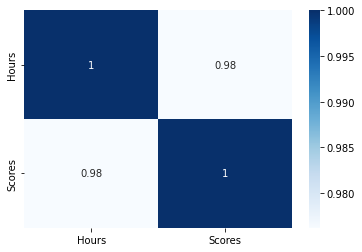

In [66]:
sns.heatmap(student_data.corr(), annot = True, cmap="Blues")

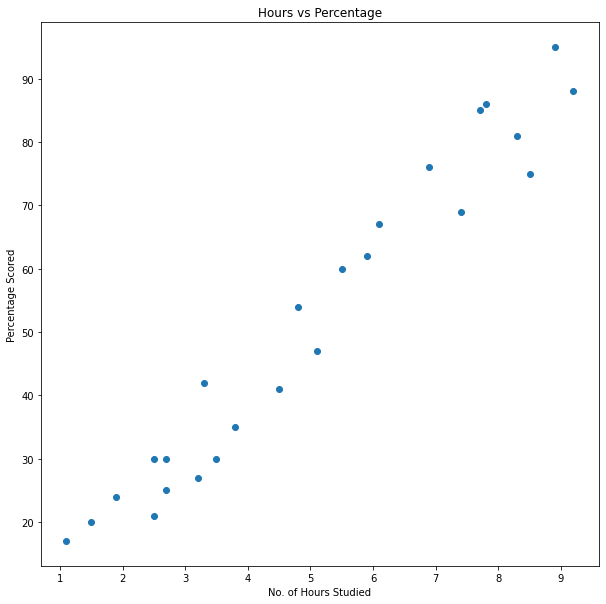

In [67]:
x = student_data.Hours
y = student_data.Scores
plt.figure(figsize=(10,10))
plt.title('Hours vs Percentage')
plt.xlabel('No. of Hours Studied')
plt.ylabel('Percentage Scored')
plt.scatter(x,y)

This graph shows a positive linear relation between the 'Number of hours Studied' and the 'Percentage' scored by the student.

##Preparing the data:

In [68]:
X = student_data.iloc[:, :-1].values
y = student_data.iloc[:,1].values

## Splitting the training and testing data:

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Choosing the model:

In [70]:
model = LinearRegression()

## Fitting/Training the data:

In [71]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the data:

In [72]:
y_pred = model.predict(X_test)

In [73]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Comparing the Actual Score and Predicted Score:

In [74]:
df = pd.DataFrame({'Actual_Score': y_test,
                   'Predicted_Score': y_pred})
print(df)

   Actual_Score  Predicted_Score
0            20        16.884145
1            27        33.732261
2            69        75.357018
3            30        26.794801
4            62        60.491033


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

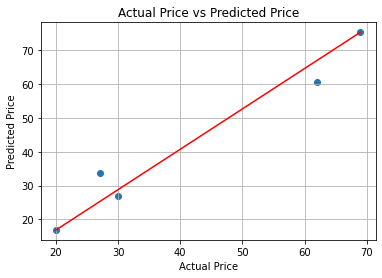

In [75]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid()
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)], color='red')
plt.title('Actual Price vs Predicted Price')

## Accuracy of the model:

In [76]:
model.score(X_test,y_test)

0.9454906892105354

In [77]:
r2_score(y_test,y_pred)

0.9454906892105354

## Evaluation of the model:



In [78]:
mean_squared_error(y_test,y_pred)

21.598769307217456

In [79]:
mean_absolute_error(y_test,y_pred)

4.183859899002982

## Finding the score of the input given by the user.

In [80]:
hours = float(input("Enter the No.of hours studied: "))
predict_score = model.predict([[hours]])
print(f"The predicted score is: {predict_score[0]}")

Enter the No.of hours studied: 9.25
The predicted score is: 93.69173248737539
